# Bank Telemarketing Classification using XGBoost and Oversampling

- The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

- The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The task at hand is a binary classification problem, where we need to predict whether a client will subscribe to a bank term deposit or not, based on the features related to the marketing campaign. Here's a high-level approach to building a classification algorithm for this task:

- Data Preprocessing

- Exploratory Data Analysis (EDA)

- Model Selection

- Error Analysis

- Model Tuning

- Result

In [25]:
! pip install xgboost
! pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 12.5 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 27.9 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [27]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

## Date Preprocessing

- Load the data and perform any necessary data cleaning and preprocessing steps such as handling missing values, converting categorical variables to numerical variables, and scaling numerical variables.

In [4]:
df = _deepnote_execute_sql('SELECT *\nFROM \'bank-additional-full.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
# Check the dimensions of the dataset. Row and columns present
df.shape

(41188, 21)

In [6]:
# View the first few rows of the dataset and get an idea of what the data looks like.
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Get some summary statistics for the numerical variables in the dataset.
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
#  Check if any of the columns have missing data.
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
# Explore the distribution of the target variable 'y' to see how many samples belong to each class.
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Note :

- There are no missing values.

- There are substantially more 'No' than 'Yes' creating an unbalanced dataset. Will come back to deal with it later.

## Exploratory Data Analysis (EDA)

- to perform some exploratory data analysis (EDA) to understand the distribution of the data and identify any patterns or trends.

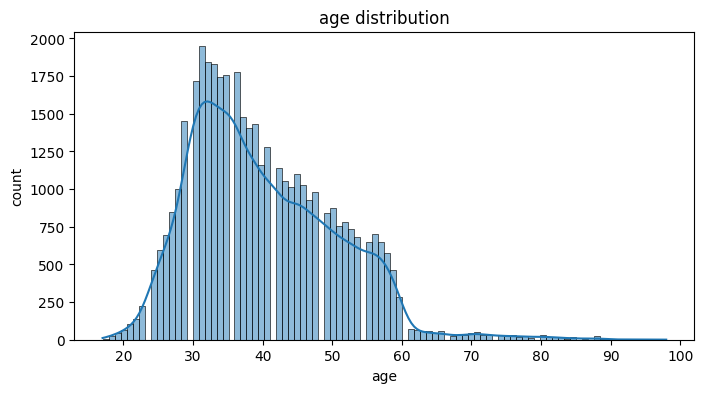

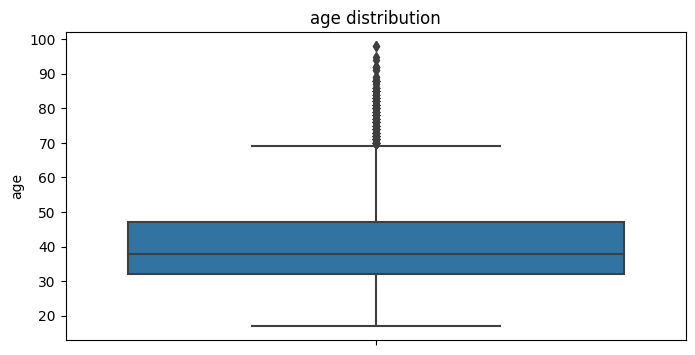

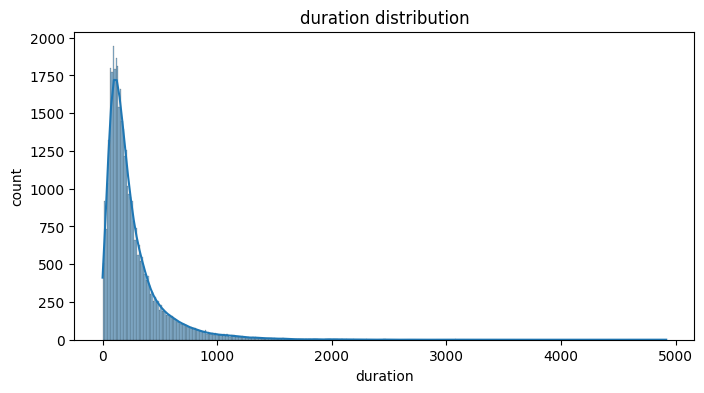

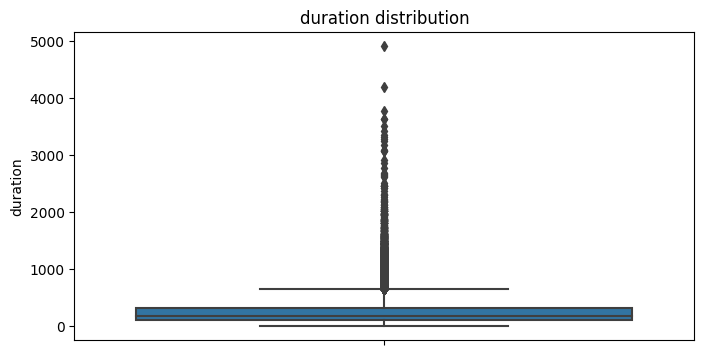

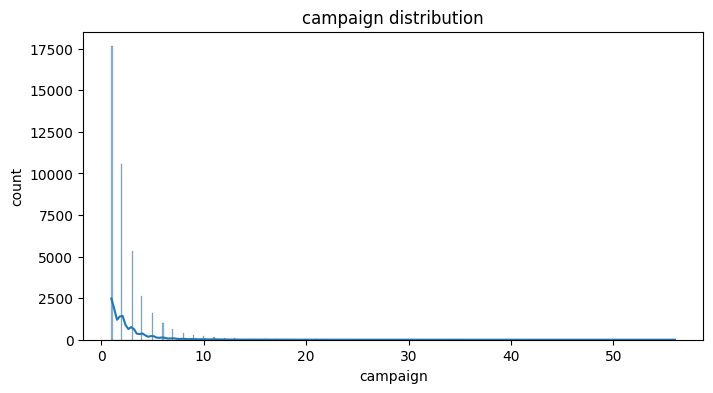

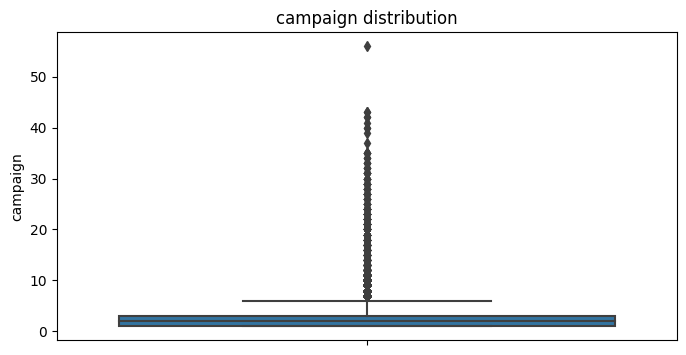

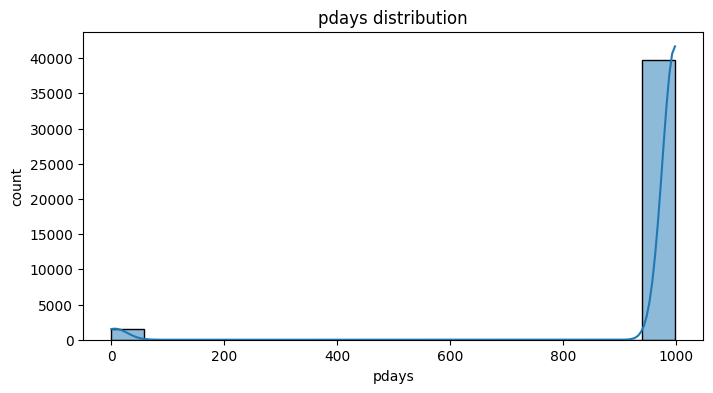

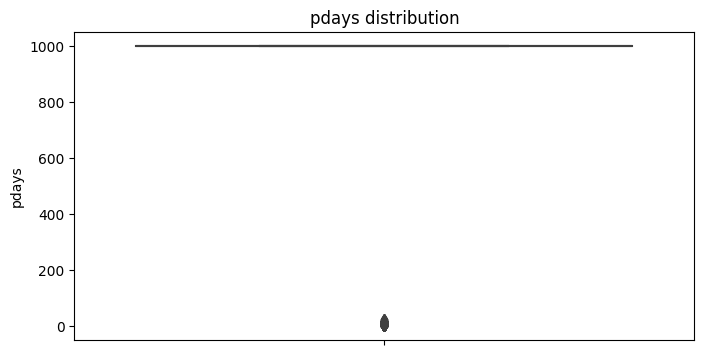

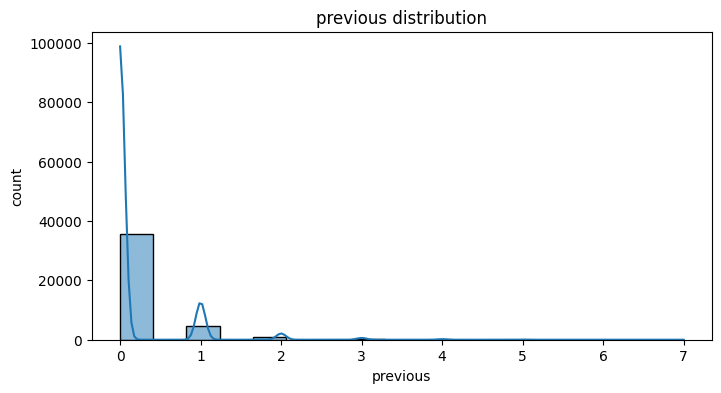

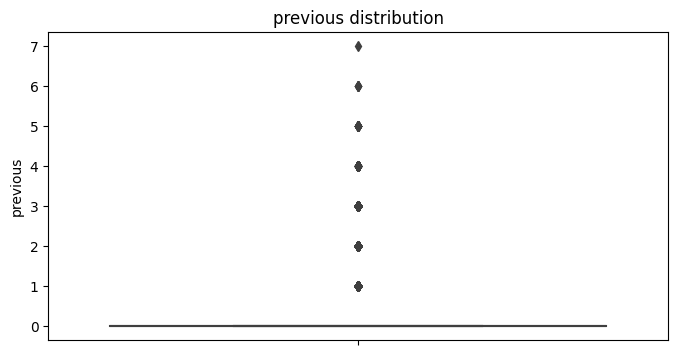

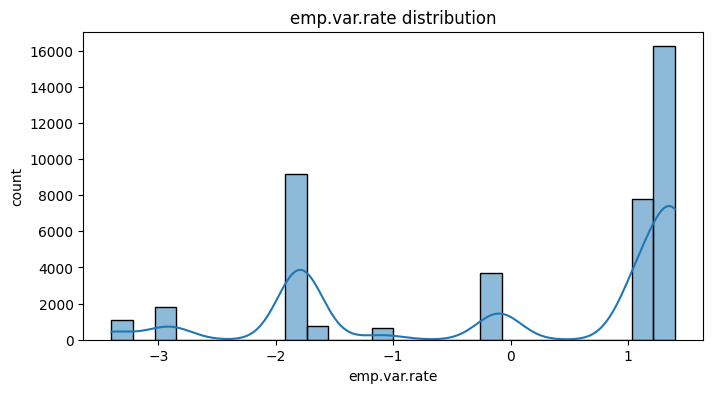

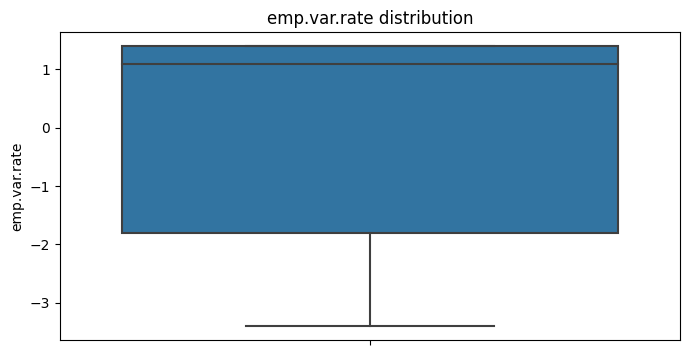

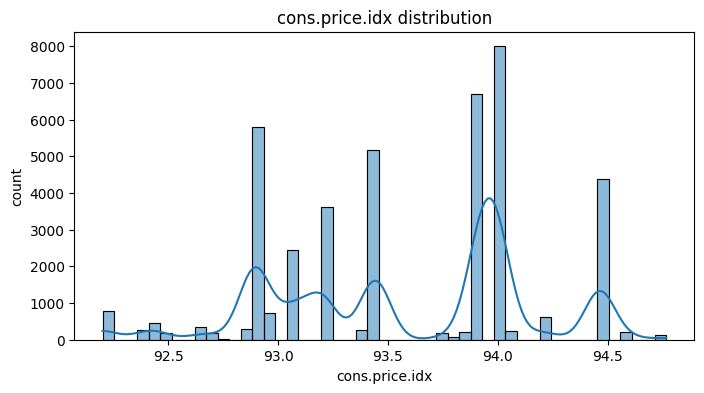

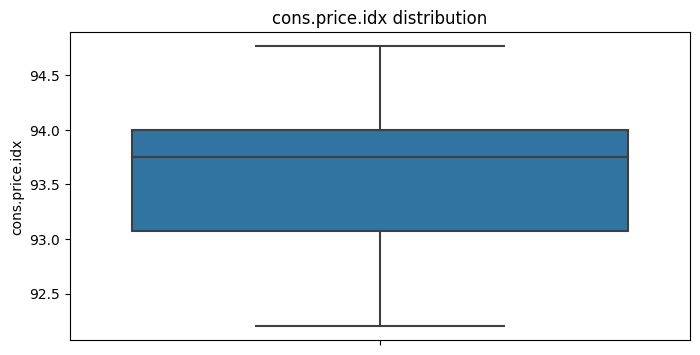

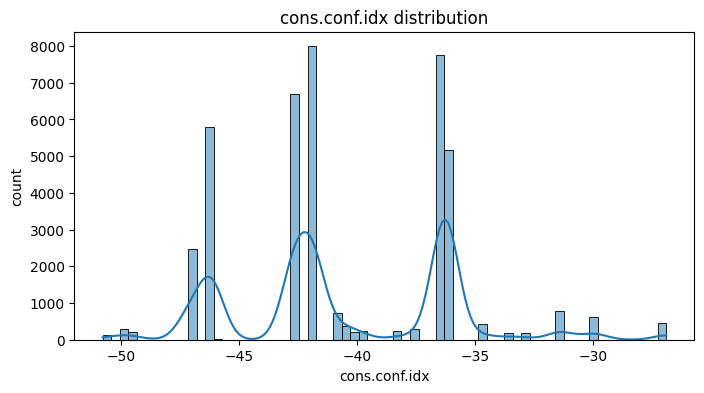

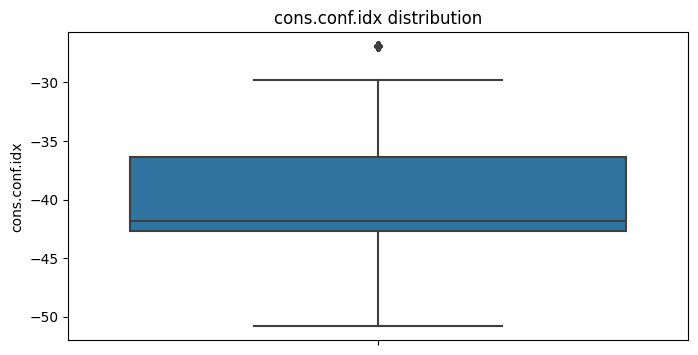

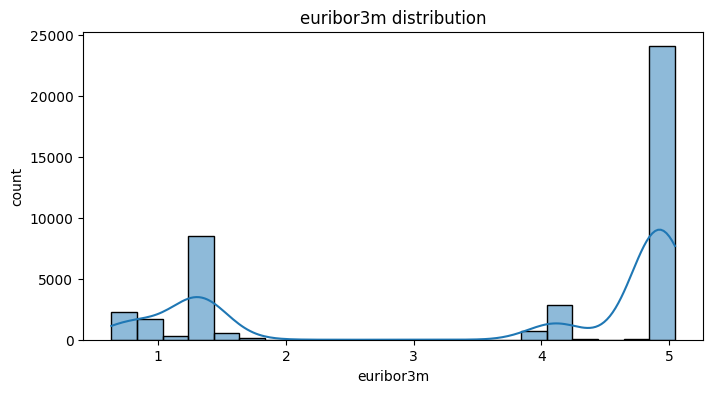

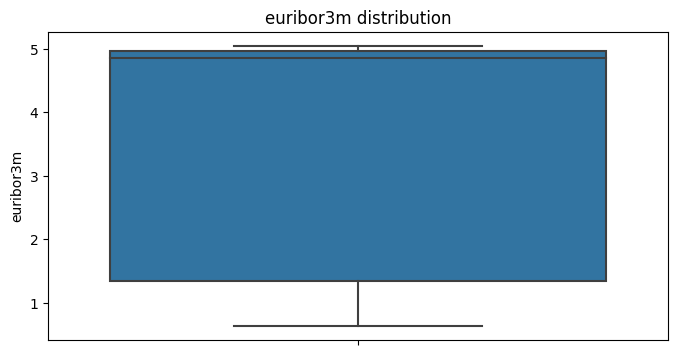

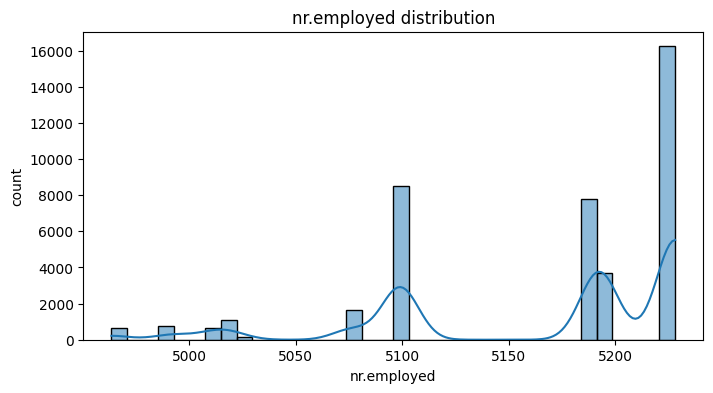

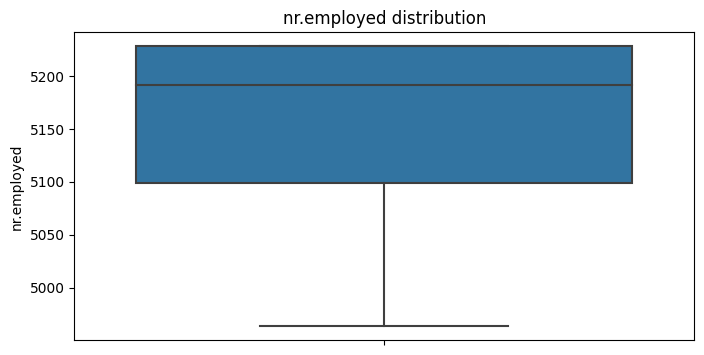

In [11]:
# Create a list of numerical column names
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
            'euribor3m', 'nr.employed']

# Loop over each numerical column and plot a histogram and boxplot
for col in num_cols:
    # Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f'{col} distribution')
    plt.ylabel(col)
    plt.show()

Note:

The histogram shows the distribution of the numerical variable, while the boxplot shows the median, interquartile range, and any outliers or extreme values. These plots can help identify any skewness or unusual values in the data, which may need to be addressed during preprocessing.

- 'age' : Looks like a normal distribution but there's a lot of values outside of Q3. 

- 'duration' : exhibits a exponential distribution. 

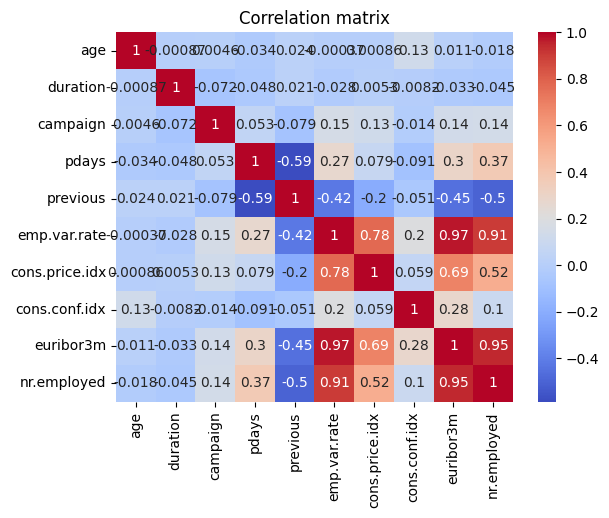

In [12]:
# Create a subset of the dataframe with only the numerical variables
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
            'euribor3m', 'nr.employed']
num_df = df[num_cols]

# Calculate the correlation matrix
corr_matrix = num_df.corr()

# Plot a heatmap to visualize the correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

Note :

The heatmap allows to visualize the strength and direction of the correlations between the numerical variables. Positive correlations are shown in shades of red, while negative correlations are shown in shades of blue. The darker the color, the stronger the correlation. This information can be useful for feature selection and identifying any multicollinearity between the variables.

- There's a high degree of correlation between euribor3m and nr.employed, euribor3m and emp.var.rate, nr.employed and emp.var rate

- Basically, the final 5 features has some high degree of correlation that have to be consider. 

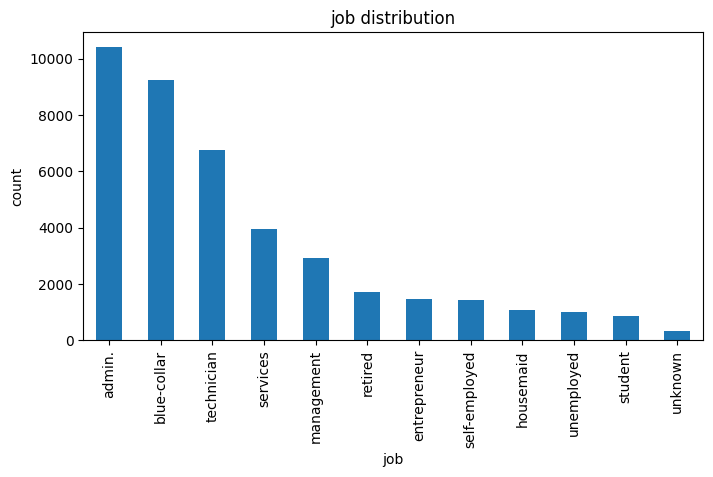

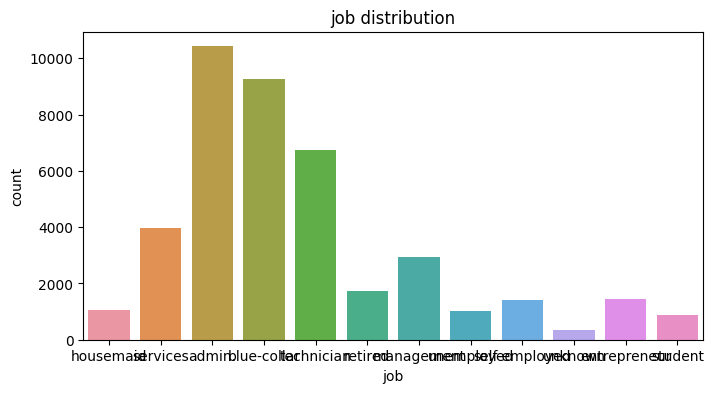

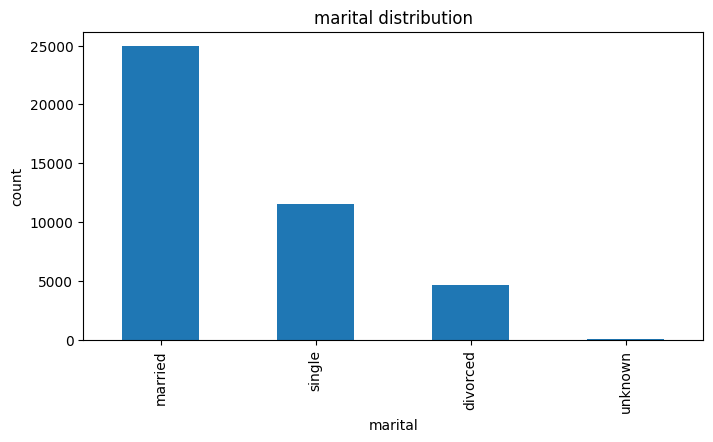

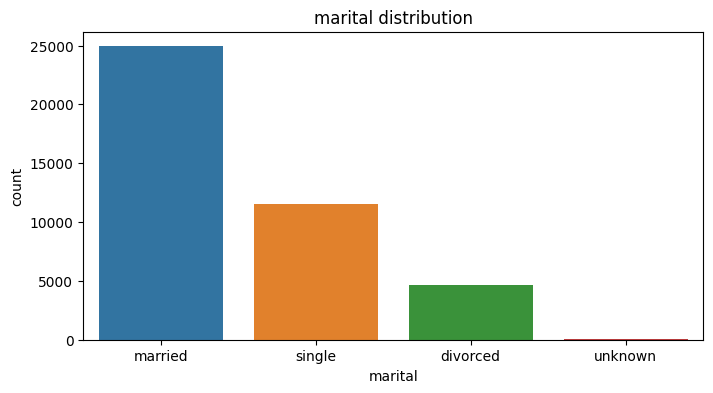

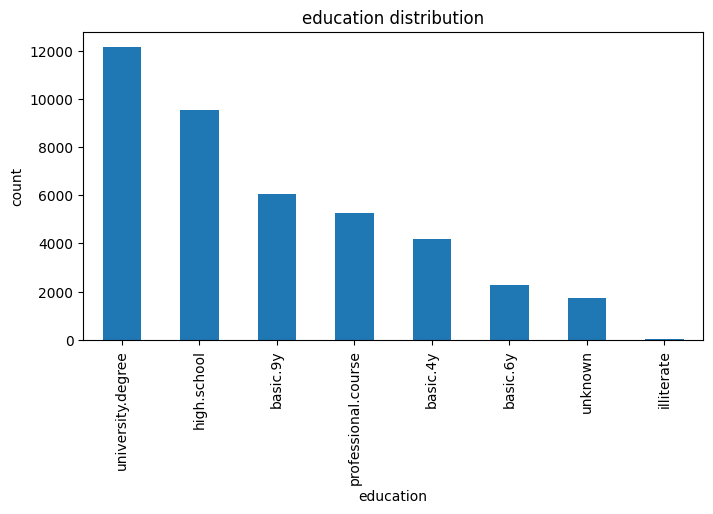

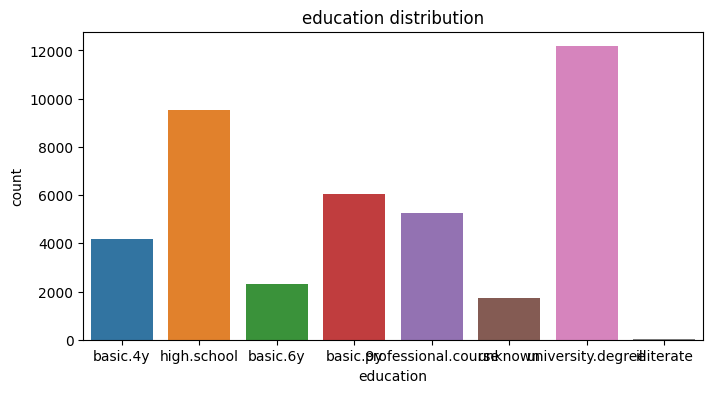

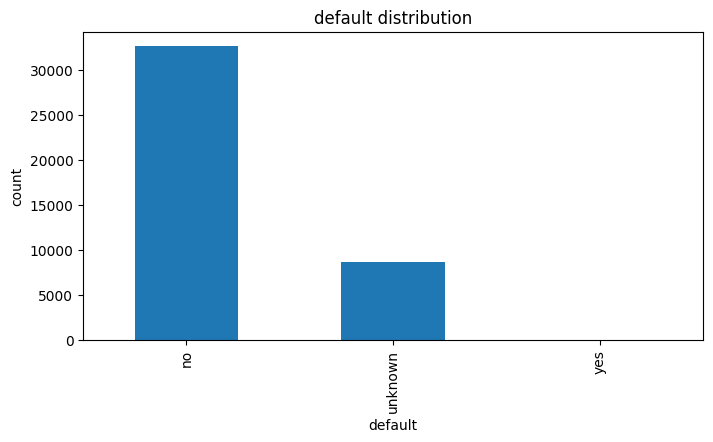

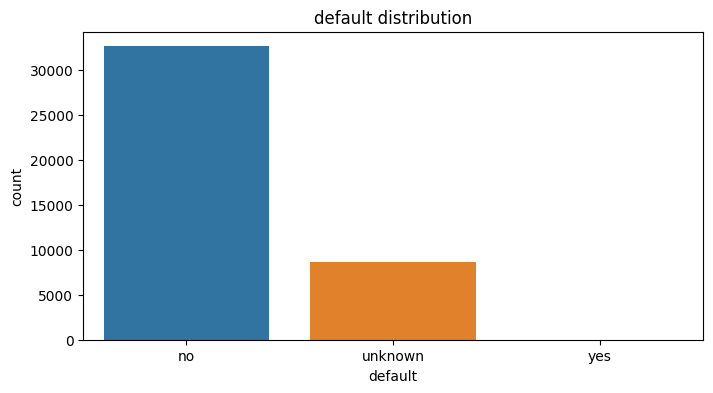

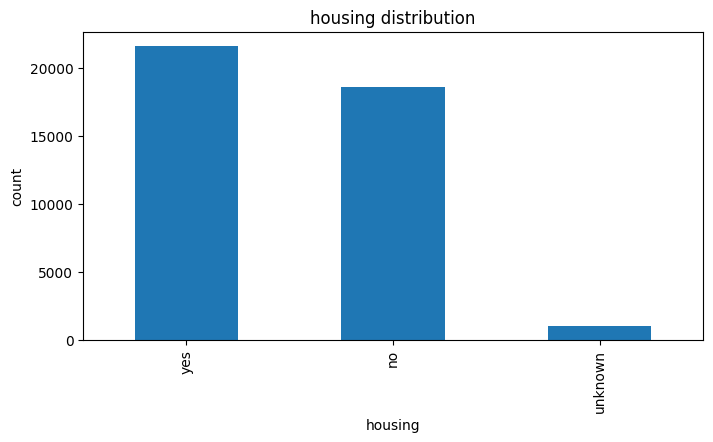

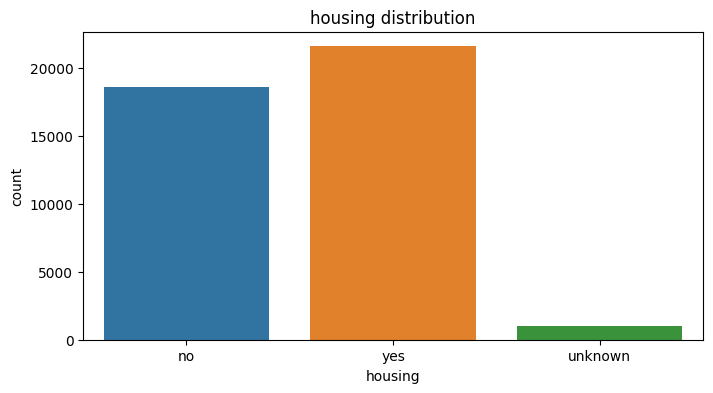

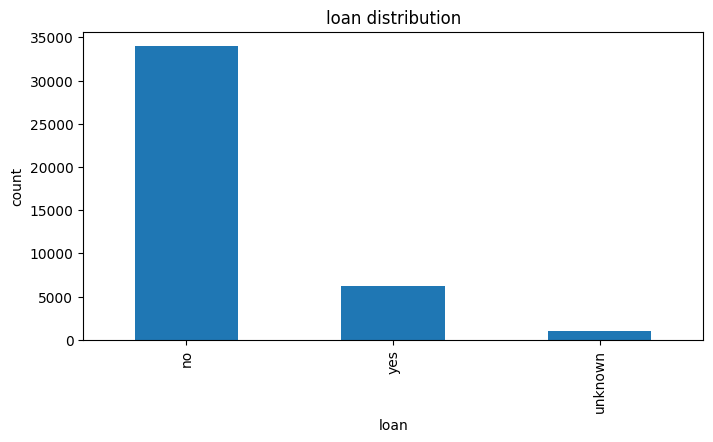

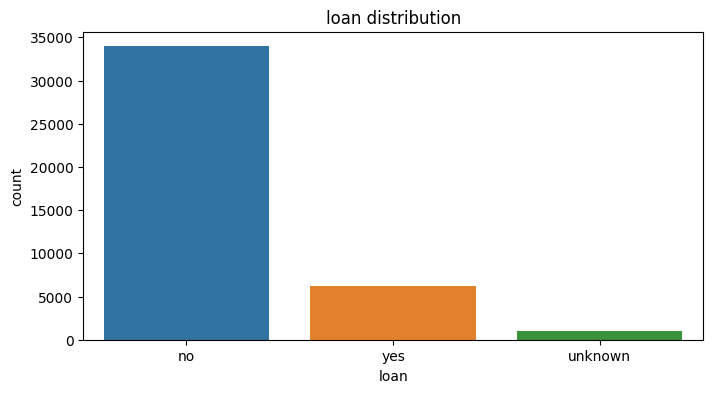

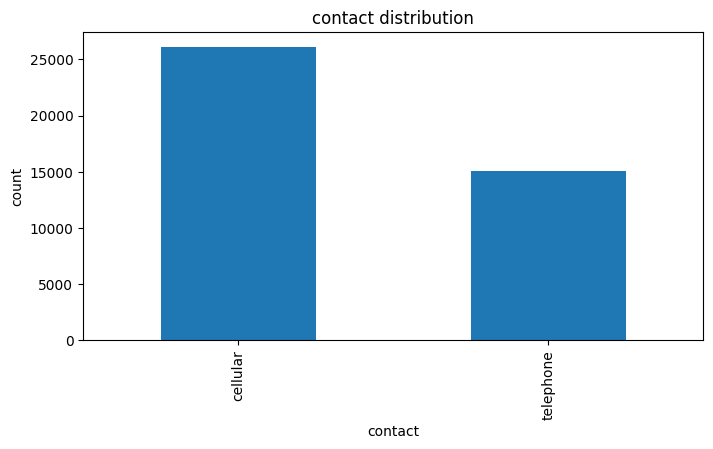

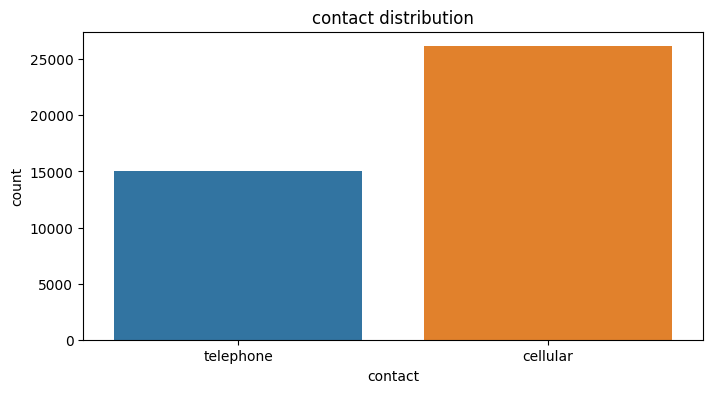

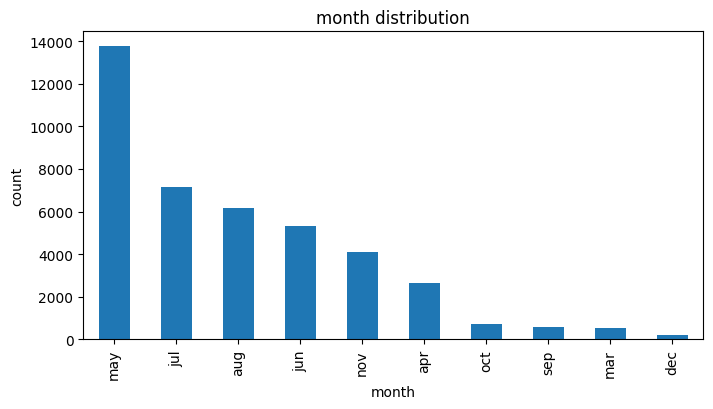

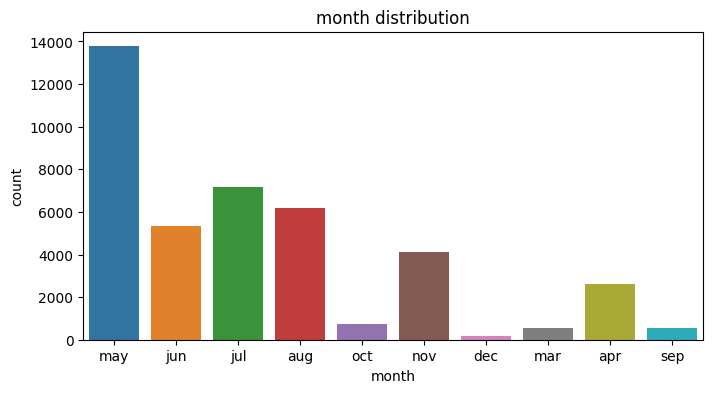

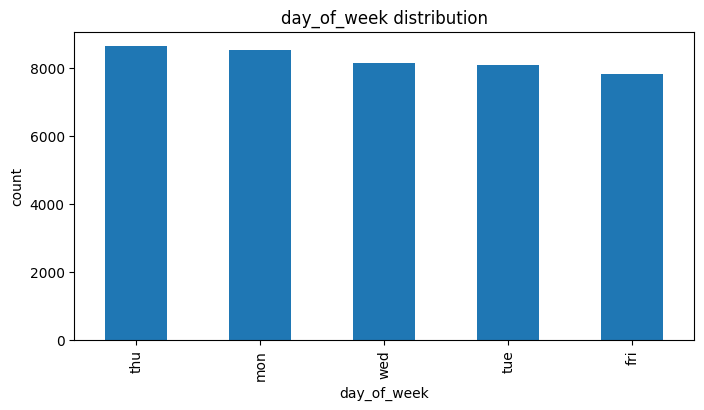

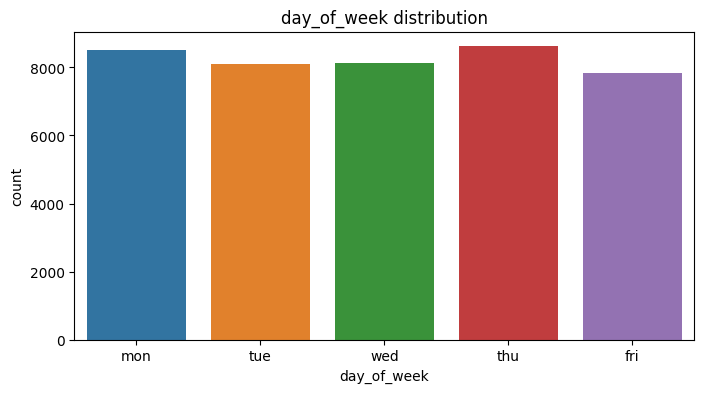

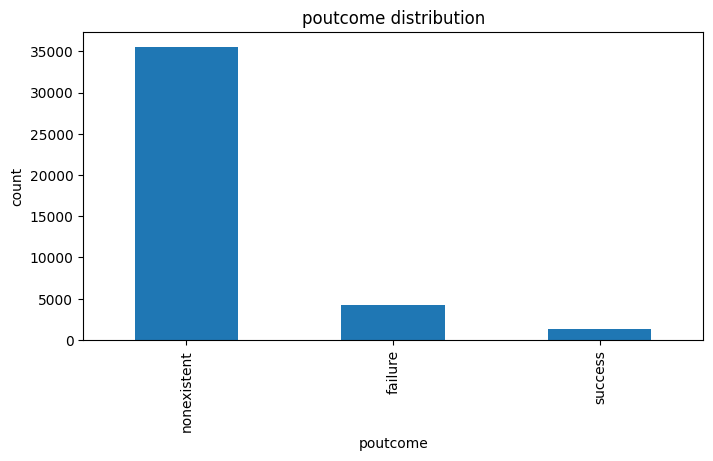

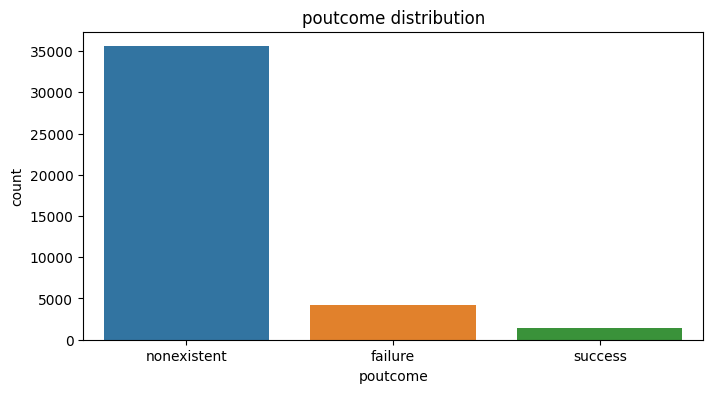

In [13]:
# Create a list of categorical column names
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 
            'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Loop over each categorical column and plot a bar chart and count plot
for col in cat_cols:
    # Bar chart
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()
    
    # Count plot
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

Note : 

The bar chart shows the distribution of each categorical variable, while the count plot shows the count of each category in the variable. These plots can help understand the distribution of the categorical variables and identify any imbalances or patterns that may be useful for modeling.

- There quite a lot of instances with admin, blue collar job, are married, has university degree/ high school, have not defaulted, have no loan, poutcome is nonexistent. 

- No too drastic imbalance here. 

## Model Selection

- Select a set of candidate classification algorithms to evaluate on the dataset. Popular algorithms for binary classification like Logistic Regression. 

### One-Hot Encoding

In [16]:
# Separate the features (X) and target variable (y)
X = df.drop('y', axis=1)
y = df['y']

# Select the numerical columns
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
X_encoded = X[numerical_cols]

# One-hot encoding
for col in cat_cols:
    # Create a one-hot encoder object
    enc = OneHotEncoder(handle_unknown='ignore')
    
    # Fit and transform the data
    enc_df  = pd.DataFrame(enc.fit_transform(df[[col]]).toarray())
    
    # Rename the columns and concatenate with the original dataframe
    enc_df  = enc_df.add_prefix(col+'_')
    X_encoded = pd.concat([X_encoded, enc_df], axis=1)

# Display the result
X_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Label Encoding

In [23]:
# Encode the binary variable using label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 0, ..., 0, 1, 0])

### Logistic Regression

In [24]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model using the test set
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.911750424860403
Precision: 0.6682847896440129
Recall: 0.44171122994652406
F1 score: 0.531873792659369
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### XGBoost

In [26]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# convert the data to xgboost's DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# set the hyperparameters for the XGBoost model
params = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
}

# train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# make predictions on the test data
y_pred = xgb_model.predict(dtest)

# convert the predictions to binary values
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test, y_pred_binary))
print('Precision:', precision_score(y_test, y_pred_binary))
print('Recall:', recall_score(y_test, y_pred_binary))
print('F1 score:', f1_score(y_test, y_pred_binary))

Accuracy: 0.9139354212187424
Precision: 0.64125
Recall: 0.5486631016042781
F1 score: 0.5913544668587897


Note: 

- Since we concluded before that the target value is highly imbalanced. 

- We should not use accuracy as the metric to evaluate model performance

- Instead, we use F1 score. 

- Here, we can conclude that our baseline F1 score is 0.53 and 0.59 which is a fairly low F1 Score, indicating the model is no doing well. 

## Error Analysis

- Next, we will use oversampling to oversample the underrepresented target value to create a balanced dataset. 

In [28]:
# Create a random oversampler object
oversampler = RandomOverSampler(random_state=42)

# Fit and transform the data
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

## Model Tuning

In [29]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# convert the data to xgboost's DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# set the hyperparameters for the XGBoost model
params = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
}

# train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# make predictions on the test data
y_pred = xgb_model.predict(dtest)

# convert the predictions to binary values
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test, y_pred_binary))
print('Precision:', precision_score(y_test, y_pred_binary))
print('Recall:', recall_score(y_test, y_pred_binary))
print('F1 score:', f1_score(y_test, y_pred_binary))

Accuracy: 0.9352880834330655
Precision: 0.897658551713444
Recall: 0.9835202174651716
F1 score: 0.938629914876368


Note : 

- By using the oversampling method and training it on XGBoost model, we have increased the F1 score from 0.59 to 0.93, indicating a model improvement of 57% with a good F1-score. 

Future improvement

- Feature scaling could be used to improve the model performance since some of the numerical features do not exhibit Gaussian distribution. 

- Feature selection could also be done since the correlation analysis indicate there might be issue with multicollinearity, challenging model assumptions that need statistical independence. 

- Hyperparameter tuning could also be done to improve the XGBoost model performance. 

Overall, 

- By using encoding techiques, oversampling techique and XGBoost, the model on this imbalanced dataset has improved by 57% achieving a F1 Score of 0.93 which is considered a useful model for the application in bank telemarketing.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6d386c46-93fe-41d3-b861-ce1d060ec63c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>